In [1]:
import pandas as pd
import numpy as np 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.nonparametric.smoothers_lowess import lowess
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [8]:
df_data = pd.read_csv("Gender_Tenure_Salary.csv")

In [9]:
df_data

,Salary,Tenure,Gender
0,2.548,3.2,Male
1,2.629,3.8,Male
2,2.011,2.7,Female
3,2.229,3.4,Female
4,2.746,3.6,Male
5,2.528,4.1,Male
6,2.018,3.8,Female
7,2.190,3.4,Female
8,2.551,3.3,Male
9,1.985,3.2,Female


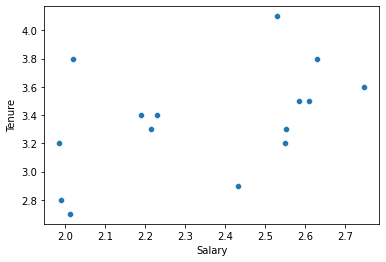

In [10]:
sns.scatterplot(data= df_data, x="Salary", y="Tenure")

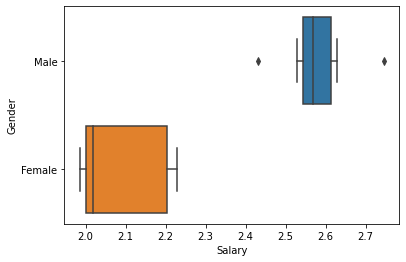

In [11]:
sns.boxplot(data= df_data, x="Salary", y="Gender")

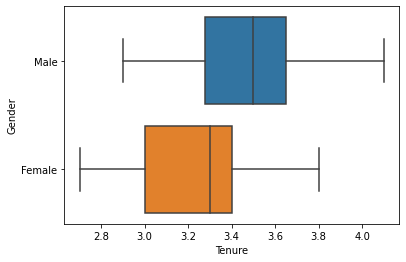

In [12]:
sns.boxplot(data= df_data, x="Tenure", y="Gender")

In [13]:
df_data.corr(method = "pearson")

,Salary,Tenure
Salary,1.000000,0.463748
Tenure,0.463748,1.000000


In [14]:
df_data.corr(method = "spearman")

,Salary,Tenure
Salary,1.000000,0.550678
Tenure,0.550678,1.000000


In [15]:
df_data.shape

(15, 3)

In [16]:
model = smf.ols(formula="Salary ~ Tenure", data=df_data)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     3.562
Date:                Wed, 02 Mar 2022   Prob (F-statistic):             0.0817
Time:                        16:27:21   Log-Likelihood:                0.67987
No. Observations:                  15   AIC:                             2.640
Df Residuals:                      13   BIC:                             4.056
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2497      0.587      2.129      0.0

In [17]:
results.ssr

0.8021371613636362

In [18]:
results.resid

0     0.251393
1     0.136098
2    -0.122027
3    -0.133039
4     0.318530
5    -0.063050
6    -0.474902
7    -0.172039
8     0.221677
9    -0.311607
10    0.215245
11    0.233541
12   -0.114323
13   -0.175743
14    0.190245
dtype: float64

In [19]:
anova_table = sm.stats.anova_lm(results, typ=2)
print(anova_table)

            sum_sq    df         F    PR(>F)
Tenure    0.219775   1.0  3.561822  0.081651
Residual  0.802137  13.0       NaN       NaN


Text(0, 0.5, 'Residuals')

Text(0.5, 0, 'Fitted Values')

Text(0.5, 1.0, 'Residuals vs. Fitted')

Text(2.4929022727272727, -0.4749022727272725, '6')

Text(2.4274704545454546, 0.3185295454545458, '4')

Text(2.296606818181818, -0.3116068181818179, '9')

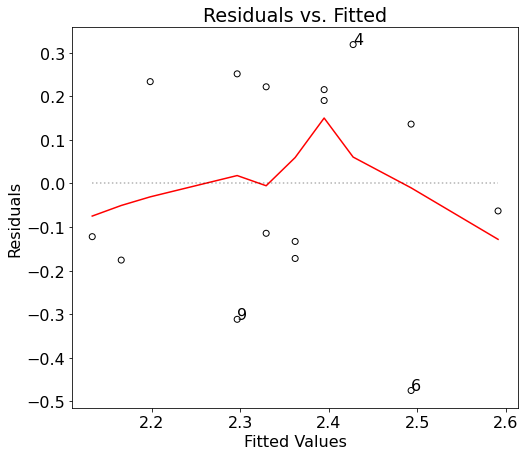

In [20]:
residuals = results.resid
fitted = results.fittedvalues
smoothed = lowess(residuals,fitted)
top3 = abs(residuals).sort_values(ascending = False)[:3]

plt.rcParams.update({'font.size': 16})
plt.rcParams["figure.figsize"] = (8,7)
fig, ax = plt.subplots()
ax.scatter(fitted, residuals, edgecolors = 'k', facecolors = 'none')
ax.plot(smoothed[:,0],smoothed[:,1],color = 'r')
ax.set_ylabel('Residuals')
ax.set_xlabel('Fitted Values')
ax.set_title('Residuals vs. Fitted')
ax.plot([min(fitted),max(fitted)],[0,0],color = 'k',linestyle = ':', alpha = .3)

for i in top3.index:
    ax.annotate(i,xy=(fitted[i],residuals[i]))

plt.show()

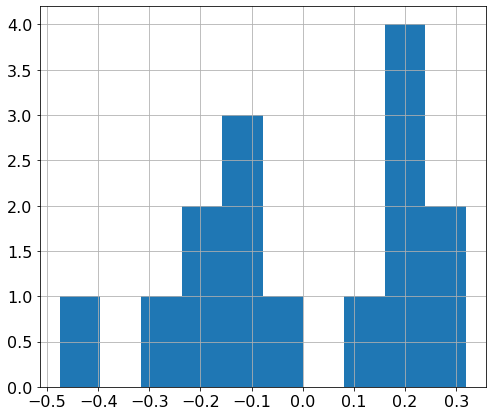

In [21]:
residuals.hist()

Text(0.5, 1.0, 'Normal Q-Q')

Text(0, 0.5, 'Standardized Residuals')

Text(0.5, 0, 'Theoretical Quantiles')

Text(-1.6937289945417815, -2.0836544870848317, '6')

Text(1.6937289945417815, 1.3465949145967306, '4')

Text(-1.2291802545414674, -1.3079958935878628, '9')

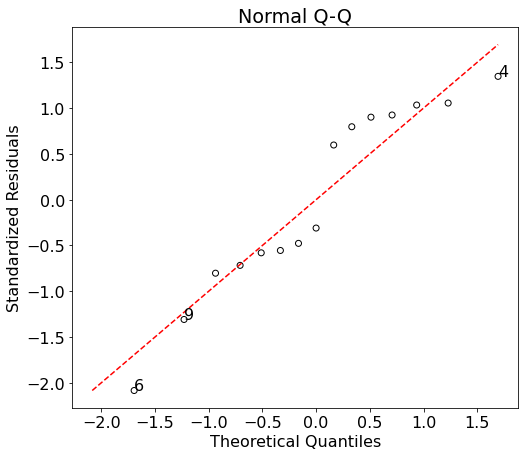

In [22]:
sorted_student_residuals = pd.Series(results.get_influence().resid_studentized_internal)
sorted_student_residuals.index = results.resid.index
sorted_student_residuals = sorted_student_residuals.sort_values(ascending = True)
df = pd.DataFrame(sorted_student_residuals)
df.columns = ['sorted_student_residuals']
df['theoretical_quantiles'] = stats.probplot(df['sorted_student_residuals'], dist = 'norm', fit = False)[0]
rankings = abs(df['sorted_student_residuals']).sort_values(ascending = False)
top3 = rankings[:3]

fig, ax = plt.subplots()
x = df['theoretical_quantiles']
y = df['sorted_student_residuals']
ax.scatter(x,y, edgecolor = 'k',facecolor = 'none')
ax.set_title('Normal Q-Q')
ax.set_ylabel('Standardized Residuals')
ax.set_xlabel('Theoretical Quantiles')
ax.plot([np.min([x,y]),np.max([x,y])],[np.min([x,y]),np.max([x,y])], color = 'r', ls = '--')
for val in top3.index:
    ax.annotate(val,xy=(df['theoretical_quantiles'].loc[val],df['sorted_student_residuals'].loc[val]))
plt.show()

In [25]:
df_data_dummies = pd.get_dummies(df_data)

In [26]:
df_data_dummies.head()

,Salary,Tenure,Gender_Female,Gender_Male
0,2.548,3.2,0,1
1,2.629,3.8,0,1
2,2.011,2.7,1,0
3,2.229,3.4,1,0
4,2.746,3.6,0,1


In [28]:
model = smf.ols(formula="Salary ~ Tenure + Gender_Male", data=df_data_dummies)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     48.54
Date:                Wed, 02 Mar 2022   Prob (F-statistic):           1.77e-06
Time:                        16:29:44   Log-Likelihood:                 15.417
No. Observations:                  15   AIC:                            -24.83
Df Residuals:                      12   BIC:                            -22.71
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.7321      0.236      7.352      

In [29]:
model = smf.ols(formula="Salary ~ Tenure + Gender_Female", data=df_data_dummies)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     48.54
Date:                Wed, 02 Mar 2022   Prob (F-statistic):           1.77e-06
Time:                        16:30:00   Log-Likelihood:                 15.417
No. Observations:                  15   AIC:                            -24.83
Df Residuals:                      12   BIC:                            -22.71
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.1907      0.254      8.635